In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
dataset=pd.read_csv('Speed Dating Data.csv', engine='python')
dataset

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [64]:
dataset.shape

(8378, 195)

In [179]:
dataset.nunique()

iid         551
id           22
gender        2
idg          44
condtn        2
           ... 
attr5_3       9
sinc5_3       9
intel5_3      7
fun5_3       10
amb5_3        9
Length: 195, dtype: int64

In [180]:
type(['gender'])

list

In [181]:
dataset.dtypes

iid           int64
id          float64
gender       object
idg           int64
condtn        int64
             ...   
attr5_3     float64
sinc5_3     float64
intel5_3    float64
fun5_3      float64
amb5_3      float64
Length: 195, dtype: object

In [182]:
def num_missing(x):
    return sum(x.isnull())
# On applique cette fonction pour chaque colonne:
print("Valeurs manquantes par colonne:")
print(dataset.apply(num_missing, axis=0)) #axis=0 définit que la fonction sera bien appliquée sur chaque colonne
# Puis application pour chaque ligne:
print("\nValeurs manquantes par ligne:")
print(dataset.apply(num_missing, axis=1).head()) #axis=1 définit que la fonction sera bien appliquée sur chaque ligne

Valeurs manquantes par colonne:
iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

Valeurs manquantes par ligne:
0    75
1    75
2    76
3    75
4    75
dtype: int64


In [183]:
dataset.loc[dataset["gender"] == 0,"gender"] = "female"
dataset.loc[dataset["gender"] == 1,"gender"] = "male"


In [184]:
dataset

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,female,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,female,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,female,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,female,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,female,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,male,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,male,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,male,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,male,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [118]:
dataset.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

In [166]:
dataset['dining']

0        9.0
1        9.0
2        9.0
3        9.0
4        9.0
        ... 
8373    10.0
8374    10.0
8375    10.0
8376    10.0
8377    10.0
Name: dining, Length: 8378, dtype: float64

In [202]:
activities=["movies","dining","music","reading","theater","museums","art","concerts","shopping","exercise","hiking","clubbing","sports","tv","yoga","tvsports","gaming"]

In [203]:
dataset.groupby("gender")["movies","dining","music","reading","theater","museums","art","concerts","shopping","exercise","hiking","clubbing","sports","tv","yoga","tvsports","gaming"].mean()

<ipython-input-203-13d7eb4adad8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataset.groupby("gender")["movies","dining","music","reading","theater","museums","art","concerts","shopping","exercise","hiking","clubbing","sports","tv","yoga","tvsports","gaming"].mean()


,movies,dining,music,reading,theater,museums,art,concerts,shopping,exercise,hiking,clubbing,sports,tv,yoga,tvsports,gaming
gender,,,,,,,,,,,,,,,,,
female,8.198061,8.147152,7.989576,7.907152,7.481939,7.428364,7.219636,7.103758,6.499152,6.450909,5.942061,5.899879,5.813333,5.739394,4.989818,4.162424,3.302303
male,7.644466,7.424772,7.714183,7.452563,6.078582,6.548395,6.215381,6.550311,4.773598,6.043124,5.534499,5.593915,7.029947,4.873982,3.696215,4.983709,4.453282


In [204]:
data_female=dataset.loc[(dataset["gender"]=="female"), ["movies","dining","music","reading","theater","museums","art","concerts","shopping","exercise","hiking","clubbing","sports","tv","yoga","tvsports","gaming"]]
data_female

,movies,dining,music,reading,theater,museums,art,concerts,shopping,exercise,hiking,clubbing,sports,tv,yoga,tvsports,gaming
0,10.0,9.0,9.0,6.0,1.0,1.0,1.0,10.0,8.0,8.0,5.0,5.0,9.0,9.0,1.0,2.0,1.0
1,10.0,9.0,9.0,6.0,1.0,1.0,1.0,10.0,8.0,8.0,5.0,5.0,9.0,9.0,1.0,2.0,1.0
2,10.0,9.0,9.0,6.0,1.0,1.0,1.0,10.0,8.0,8.0,5.0,5.0,9.0,9.0,1.0,2.0,1.0
3,10.0,9.0,9.0,6.0,1.0,1.0,1.0,10.0,8.0,8.0,5.0,5.0,9.0,9.0,1.0,2.0,1.0
4,10.0,9.0,9.0,6.0,1.0,1.0,1.0,10.0,8.0,8.0,5.0,5.0,9.0,9.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889,10.0,6.0,10.0,3.0,8.0,3.0,8.0,9.0,6.0,5.0,6.0,6.0,7.0,5.0,3.0,10.0,7.0
7890,10.0,6.0,10.0,3.0,8.0,3.0,8.0,9.0,6.0,5.0,6.0,6.0,7.0,5.0,3.0,10.0,7.0
7891,10.0,6.0,10.0,3.0,8.0,3.0,8.0,9.0,6.0,5.0,6.0,6.0,7.0,5.0,3.0,10.0,7.0
7892,10.0,6.0,10.0,3.0,8.0,3.0,8.0,9.0,6.0,5.0,6.0,6.0,7.0,5.0,3.0,10.0,7.0


In [207]:
hobbies_mean_female=data_female[activities].mean()
hobbies_mean_female

movies      8.198061
dining      8.147152
music       7.989576
reading     7.907152
theater     7.481939
museums     7.428364
art         7.219636
concerts    7.103758
shopping    6.499152
exercise    6.450909
hiking      5.942061
clubbing    5.899879
sports      5.813333
tv          5.739394
yoga        4.989818
tvsports    4.162424
gaming      3.302303
dtype: float64

In [157]:
hobbies_index=hobbies_mean.index
hobbies_index

Index(['movies', 'dining', 'music', 'reading', 'theater', 'museums', 'art',
       'concerts', 'shopping', 'exercise', 'hiking', 'clubbing', 'sports',
       'tv', 'yoga', 'tvsports', 'gaming'],
      dtype='object')

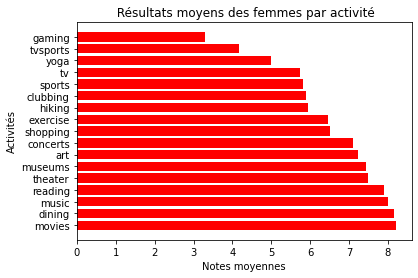

In [220]:
barWidth = 0.8
plt.barh(hobbies_index,hobbies_mean_female,color="r")
plt.title(" Résultats moyens des femmes par activité")
plt.xlabel("Notes moyennes")
plt.ylabel("Activités")
plt.show()

In [243]:
data_male=dataset.loc[(dataset["gender"]=="male"), ["movies","dining","music","reading","theater","museums","art","concerts","shopping","exercise","hiking","clubbing","sports","tv","yoga","tvsports","gaming"]]
data_male

,movies,dining,music,reading,theater,museums,art,concerts,shopping,exercise,hiking,clubbing,sports,tv,yoga,tvsports,gaming
100,8.0,6.0,8.0,9.0,4.0,7.0,5.0,7.0,5.0,2.0,5.0,4.0,8.0,2.0,1.0,7.0,5.0
101,8.0,6.0,8.0,9.0,4.0,7.0,5.0,7.0,5.0,2.0,5.0,4.0,8.0,2.0,1.0,7.0,5.0
102,8.0,6.0,8.0,9.0,4.0,7.0,5.0,7.0,5.0,2.0,5.0,4.0,8.0,2.0,1.0,7.0,5.0
103,8.0,6.0,8.0,9.0,4.0,7.0,5.0,7.0,5.0,2.0,5.0,4.0,8.0,2.0,1.0,7.0,5.0
104,8.0,6.0,8.0,9.0,4.0,7.0,5.0,7.0,5.0,2.0,5.0,4.0,8.0,2.0,1.0,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,9.0,10.0,10.0,8.0,7.0,10.0,10.0,10.0,7.0,5.0,7.0,9.0,8.0,3.0,3.0,2.0,1.0
8374,9.0,10.0,10.0,8.0,7.0,10.0,10.0,10.0,7.0,5.0,7.0,9.0,8.0,3.0,3.0,2.0,1.0
8375,9.0,10.0,10.0,8.0,7.0,10.0,10.0,10.0,7.0,5.0,7.0,9.0,8.0,3.0,3.0,2.0,1.0
8376,9.0,10.0,10.0,8.0,7.0,10.0,10.0,10.0,7.0,5.0,7.0,9.0,8.0,3.0,3.0,2.0,1.0


In [246]:
hobbies_mean_male=data_male[activities].mean()
hobbies_mean_male

movies      7.644466
dining      7.424772
music       7.714183
reading     7.452563
theater     6.078582
museums     6.548395
art         6.215381
concerts    6.550311
shopping    4.773598
exercise    6.043124
hiking      5.534499
clubbing    5.593915
sports      7.029947
tv          4.873982
yoga        3.696215
tvsports    4.983709
gaming      4.453282
dtype: float64

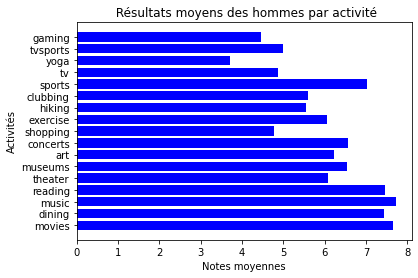

In [257]:
barWidth = 0.8
plt.barh(hobbies_index,hobbies_mean_male,color="b")
plt.title(" Résultats moyens des hommes par activité")
plt.xlabel("Notes moyennes")
plt.ylabel("Activités")
plt.show()

In [275]:
dataset["age"]

0       21.0
1       21.0
2       21.0
3       21.0
4       21.0
        ... 
8373    25.0
8374    25.0
8375    25.0
8376    25.0
8377    25.0
Name: age, Length: 8378, dtype: float64

In [304]:
data_age_f=dataset.loc[(dataset["gender"])=="female",["age"]]
data_age_m=dataset.loc[(dataset["gender"])=="male",["age"]]

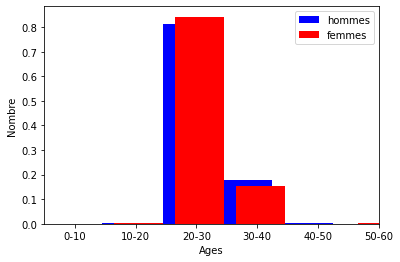

In [341]:

fig, ax = plt.subplots()
ax.bar(np.arange(10)-0.15, males/np.sum(males), color='b', label='hommes')
ax.bar(np.arange(10)+0.05, females/np.sum(females), color='r', label='femmes')
ax.set_xticks(np.arange(10))
ax.set_xticklabels(age)
ax.legend()
plt.xlabel("Ages")
plt.ylabel("Nombre")
ax.set_xlim(-0.5,5)
plt.show()